In [2]:
from qiskit import *
from qiskit import Aer, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info.operators.symplectic.pauli import Pauli
from qiskit.visualization import plot_histogram, plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere, plot_bloch_vector, plot_state_city, plot_bloch_multivector
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor
from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit import assemble
import qiskit.quantum_info as qi
from qiskit.circuit import Gate
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
import numpy as np
import matplotlib.pyplot as plt 
from qiskit.providers.aer.noise import NoiseModel
from qiskit import IBMQ

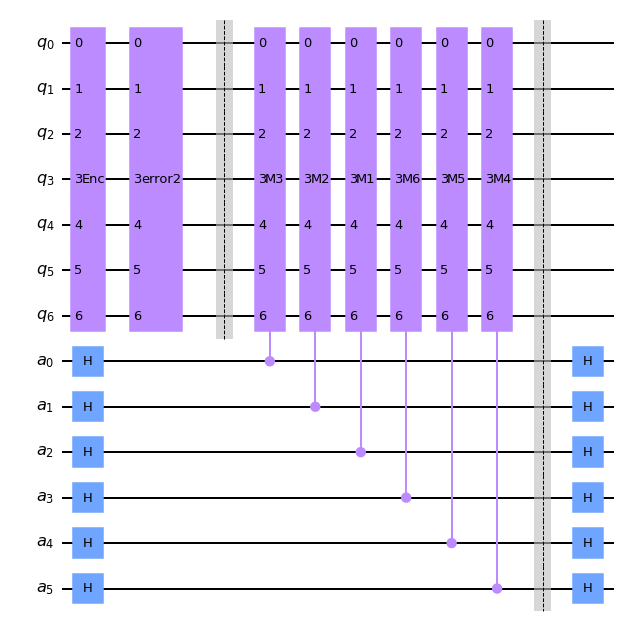

In [8]:
all_qubits=[0,1,2,3,4,5,6]
qe=QuantumCircuit(7, name='error')
qe2=QuantumCircuit(7, name='error2')
ident3 = qi.Operator(np.identity(2**7))
qe.unitary(ident3, all_qubits, label='error')
qc_3qx = QuantumCircuit(7, name='M')
def Encoding7():
    q_encoding=QuantumCircuit(7,name='Enc')
    #Hadamards
    q_encoding.h(6)
    q_encoding.h(5)
    q_encoding.h(4)
    q_encoding.cx(0,1)
    q_encoding.cx(0,2)
    q_encoding.cx(6,3)
    q_encoding.cx(6,1)
    q_encoding.cx(6,0)
    q_encoding.cx(5,3)
    q_encoding.cx(5,2)
    q_encoding.cx(5,0)
    q_encoding.cx(4,3)
    q_encoding.cx(4,2)
    q_encoding.cx(4,1)
    #q_encoding.draw('mpl',  filename='Encoding_Seven')
    #plt.show()
    return q_encoding

#####
# Measurement function (Apply it when you want to look at the results)
#####
def measurement7(circ,nqubit,noise_model=NoiseModel(['unitary']),shots=100000):
    cr3=ClassicalRegister(nqubit, 'outcomes')
    circ.add_register(cr3)
    circ.measure(all_qubits,cr3)
    counts=execute(qc_3qx,backend = aer_sim, noise_model=noise_model, shots=shots).result().get_counts()
    return counts

qc_3qx.append(Encoding7(),all_qubits)
qc_3qx.barrier()
####
#Attaching unitary identity gates (faulty gates)
####
#qc_3qx.append(qe, all_qubits)
qc_3qx.append(qe2, all_qubits)
qc_3qx.barrier()
ancX=QuantumRegister(6, 'a') ### Ancilla qubit
qc_3qx.add_register(ancX)

for i in range(7,13):
        qc_3qx.h(i)



#####
#Create the stabilizer
#####
stab1Z=QuantumCircuit(7, name='M1') #IIIZZZZ
for i in range(0,stab1Z.num_qubits-1):
    stab1Z.z(i)
stab1Z=stab1Z.to_gate().control(1)
stab2Z=QuantumCircuit(7, name='M2') #IZZIIZZ
for i in range(0,stab2Z.num_qubits-1):
    stab2Z.z(i)
stab2Z=stab2Z.to_gate().control(1)
stab3Z=QuantumCircuit(7, name='M3') #ZIZIZIZ
for i in range(0,stab3Z.num_qubits-1):
    stab3Z.z(i)
stab3Z=stab3Z.to_gate().control(1)
stab1X=QuantumCircuit(7,name='M4') #IIIXXXX
for i in range(0,stab1X.num_qubits-1):
    stab1X.x(i)
stab1X=stab1X.to_gate().control(1)
stab2X=QuantumCircuit(7, name='M5') #IXXIIXX
for i in range(0,stab2X.num_qubits-1):
    stab2X.x(i)
stab2X=stab2X.to_gate().control(1)
stab3X=QuantumCircuit(7, name='M6') #XIXIXIX
for i in range(0,stab3X.num_qubits-1):
    stab3X.x(i)
stab3X=stab3X.to_gate().control(1)

qc_3qx.append(stab3Z,[7,0,1,2,3,4,5,6])
qc_3qx.append(stab2Z,[8,0,1,2,3,4,5,6]) ##Stab Z goes in ancX and then crX
qc_3qx.append(stab1Z,[9,0,1,2,3,4,5,6])

qc_3qx.append(stab3X,[10,0,1,2,3,4,5,6])
qc_3qx.append(stab2X,[11,0,1,2,3,4,5,6]) ##Stab Z goes in ancX and then crX
qc_3qx.append(stab1X,[12,0,1,2,3,4,5,6])

qc_3qx.barrier()

for i in range(7,13):
        qc_3qx.h(i)

qc_3qx.draw('mpl')
plt.show()

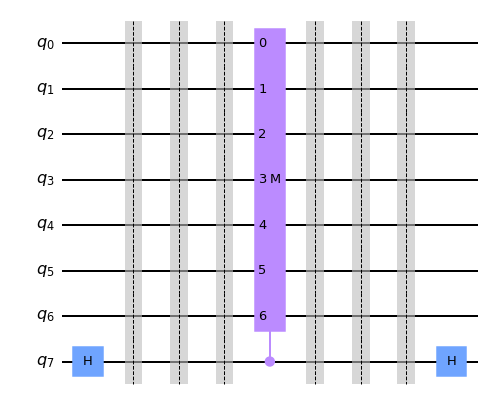

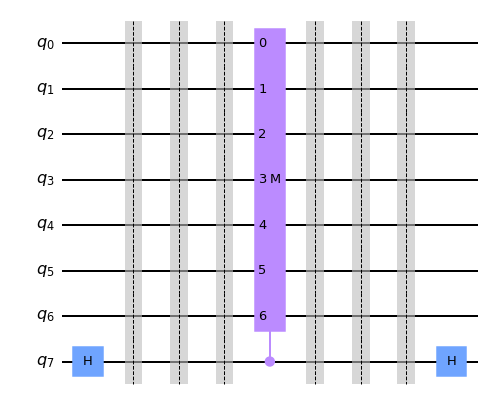

In [9]:
all_qubits=[0,1,2,3,4,5,6]
qc1 = QuantumCircuit(7, name='M')
qc1.h(3)
custom = qc1.to_gate().control(1)

qc2 = QuantumCircuit(8)
qc2.h(7)
qc2.barrier()
qc2.barrier()
qc2.barrier()
qc2.append(custom, [7,0,1,2,3,4,5,6])
qc2.barrier()
qc2.barrier()
qc2.barrier()
qc2.h(7)

qc2.draw(output='mpl',idle_wires=False, with_layout=True)

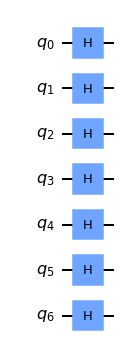

In [10]:
qc=QuantumCircuit(7)
for i in range(0,7):
    qc.h(i)
qc.draw('mpl')
plt.show()

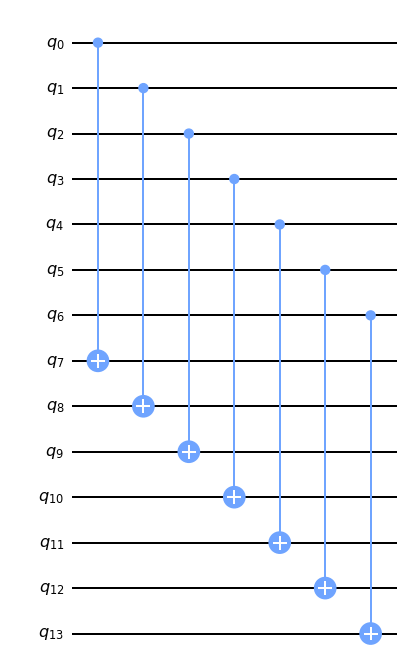

In [13]:
qc1=QuantumCircuit(14)
for i in range (0,7):
    qc1.cx(i,i+7)
qc1.draw('mpl')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


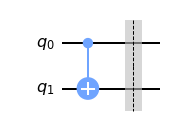

In [5]:
qc3=QuantumCircuit(2)
qc3.cx(0,1)
qc3.barrier()
qc3.draw('mpl',filename='CNOTZ_gate_prop.eps')
plt.show()